# IMDB Data Analysis:

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
#load imdb data
# Encoding error will arise here as utf-8 encoding might become ambigous so change the encoding
imdb_data=pd.read_csv('imdb-data.csv',encoding='latin-1')

In [85]:
imdb_data.head()

,Movie_Name,Year,Rating,Description,Director,Stars,Certificate,Runtime,Genre,Votes,Gross
0,The Shawshank Redemption,(1994),9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",A,142 min,Drama,2239076,"28,341,469"
1,The Godfather,(1972),9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",A,175 min,"Crime, Drama",1544094,"134,966,411"
2,The Dark Knight,(2008),9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",UA,152 min,"Action, Crime, Drama",2209073,"534,858,444"
3,The Godfather: Part II,(1974),9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",A,202 min,"Crime, Drama",1079839,"57,300,000"
4,The Lord of the Rings: The Return of the King,(2003),8.9,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",16,201 min,"Adventure, Drama, Fantasy",1583334,"377,845,905"


In [86]:
imdb_data.shape

(1000, 11)

In [87]:
#To reduce the precision value use round()
# Describes Numerical data
imdb_data.describe().round(2)

,Rating,Votes
count,1000.00,1000.00
mean,7.94,265111.52
std,0.28,312875.95
min,7.50,25023.00
25%,7.70,54565.50
50%,7.90,136501.50
75%,8.10,363876.50
max,9.30,2239076.00


In [88]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_Name   1000 non-null   object 
 1   Year         1000 non-null   object 
 2   Rating       1000 non-null   float64
 3   Description  1000 non-null   object 
 4   Director     1000 non-null   object 
 5   Stars        1000 non-null   object 
 6   Certificate  710 non-null    object 
 7   Runtime      1000 non-null   object 
 8   Genre        1000 non-null   object 
 9   Votes        1000 non-null   int64  
 10  Gross        844 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 86.1+ KB


In [89]:
# Only Certificate and Gross have the null values and we need to handle that.
# But if we see the Gross dtype is object but for analysis we need it as numerical.

In [131]:
# Change the Gross to numeric
def remove_comma(var):
    v=0
    if isinstance(var,str):
        v=int(str(var).replace(',',''))
    else:
        v=var
    return v
imdb_data['Gross']=imdb_data['Gross'].apply(lambda x:remove_comma(x))

In [132]:
# c
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_Name   1000 non-null   object 
 1   Year         1000 non-null   object 
 2   Rating       1000 non-null   float64
 3   Description  1000 non-null   object 
 4   Director     1000 non-null   object 
 5   Stars        1000 non-null   object 
 6   Certificate  710 non-null    object 
 7   Runtime      1000 non-null   object 
 8   Genre        1000 non-null   object 
 9   Votes        1000 non-null   int64  
 10  Gross        844 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [135]:
imdb_data['Gross']=imdb_data['Gross'].fillna(imdb_data['Gross'].mean())

In [136]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_Name   1000 non-null   object 
 1   Year         1000 non-null   object 
 2   Rating       1000 non-null   float64
 3   Description  1000 non-null   object 
 4   Director     1000 non-null   object 
 5   Stars        1000 non-null   object 
 6   Certificate  710 non-null    object 
 7   Runtime      1000 non-null   object 
 8   Genre        1000 non-null   object 
 9   Votes        1000 non-null   int64  
 10  Gross        1000 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [137]:
imdb_data['Gross'].isnull().sum()

0

In [147]:
#Now comes the Certificate:
imdb_data['Certificate'].unique()

array(['A', 'UA', '16', nan, 'U', 'PG-13', 'R', 'PG', 'G', '7',
       'Not Rated', 'Unrated', '15+', '(Banned)', 'U/A', 'NC-17'],
      dtype=object)

In [146]:
imdb_data['Certificate'].value_counts()

R            204
U            129
UA           125
A            124
PG-13         60
PG            42
G              9
16             6
U/A            3
Unrated        2
(Banned)       2
15+            1
7              1
Not Rated      1
NC-17          1
Name: Certificate, dtype: int64

In [148]:
# Here we see R is mode so fill with R:
imdb_data['Certificate']=imdb_data['Certificate'].fillna('R')

In [149]:
imdb_data['Certificate'].isnull().sum()

0

In [150]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Movie_Name   1000 non-null   object 
 1   Year         1000 non-null   object 
 2   Rating       1000 non-null   float64
 3   Description  1000 non-null   object 
 4   Director     1000 non-null   object 
 5   Stars        1000 non-null   object 
 6   Certificate  1000 non-null   object 
 7   Runtime      1000 non-null   object 
 8   Genre        1000 non-null   object 
 9   Votes        1000 non-null   int64  
 10  Gross        1000 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 86.1+ KB


In [184]:
#Change the runtime from minutes to hours
def convert(var):
    num=var.replace('min','').strip()
    return int(num)/60
imdb_data['Runtime']=imdb_data['Runtime'].apply(lambda x:convert(x))

In [181]:
imdb_data.head()

,Movie_Name,Year,Rating,Description,Director,Stars,Certificate,Runtime,Genre,Votes,Gross
0,The Shawshank Redemption,(1994),9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",A,2.366667,Drama,2239076,28341469.0
1,The Godfather,(1972),9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",A,2.916667,"Crime, Drama",1544094,134966411.0
2,The Dark Knight,(2008),9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",UA,2.533333,"Action, Crime, Drama",2209073,534858444.0
3,The Godfather: Part II,(1974),9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",A,3.366667,"Crime, Drama",1079839,57300000.0
4,The Lord of the Rings: The Return of the King,(2003),8.9,Gandalf and Aragorn lead the World of Men agai...,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",16,3.350000,"Adventure, Drama, Fantasy",1583334,377845905.0


In [161]:
# GroupBy the complete dataframe by Rating:
rating_group=imdb_data.groupby('Rating')
rating_group.get_group(8.0)

,Movie_Name,Year,Rating,Description,Director,Stars,Certificate,Runtime,Genre,Votes,Gross
315,Shoplifters,(2018),8.0,A family of small-time crooks take in a child ...,Hirokazu Koreeda,"Lily Franky, Sakura Andô, Kirin Kiki, Mayu Mat...",A,121 min,"Crime, Drama",52069,3313513.0
316,Marriage Story,(2019),8.0,Noah Baumbach's incisive and compassionate loo...,Noah Baumbach,"Adam Driver, Scarlett Johansson, Julia Greer, ...",16,137 min,"Comedy, Drama, Romance",211543,68631106.0
317,Airlift,(2016),8.0,"When Iraq invades Kuwait in August 1990, a cal...",Raja Menon,"Akshay Kumar, Nimrat Kaur, Kumud Mishra, Praka...",UA,130 min,"Drama, History",50979,68631106.0
318,Bajrangi Bhaijaan,(2015),8.0,An Indian man with a magnanimous heart takes a...,Kabir Khan,"Salman Khan, Harshaali Malhotra, Nawazuddin Si...",UA,163 min,"Action, Comedy, Drama",68317,8178001.0
319,Baby,(I) (2015),8.0,An elite counter-intelligence unit learns of a...,Neeraj Pandey,"Akshay Kumar, Danny Denzongpa, Rana Daggubati,...",UA,159 min,"Action, Thriller",50840,68631106.0
...,...,...,...,...,...,...,...,...,...,...,...
449,The Wizard of Oz,(1939),8.0,Dorothy Gale is swept away from a farm in Kans...,"Victor Fleming, George Cukor, Mervyn LeRoy, No...","Judy Garland, Frank Morgan, Ray Bolger, Bert Lahr",PG,102 min,"Adventure, Family, Fantasy",363480,2076020.0
450,La règle du jeu,(1939),8.0,A bourgeois life in France at the onset of Wor...,Jean Renoir,"Marcel Dalio, Nora Gregor, Paulette Dubost, Mi...",R,110 min,"Comedy, Drama",25640,68631106.0
451,The Thin Man,(1934),8.0,Former detective Nick Charles and his wealthy ...,W.S. Van Dyke,"William Powell, Myrna Loy, Maureen O'Sullivan,...",R,91 min,"Comedy, Crime, Mystery",25347,68631106.0
452,All Quiet on the Western Front,(1930),8.0,A young soldier faces profound disillusionment...,Lewis Milestone,"Lew Ayres, Louis Wolheim, John Wray, Arnold Lucy",R,152 min,"Drama, War",55637,3270000.0


In [173]:
#Get the list of movies on a specific year
year_group=imdb_data.groupby('Year')
df_2018=year_group.get_group('(2018)')
df_2018

,Movie_Name,Year,Rating,Description,Director,Stars,Certificate,Runtime,Genre,Votes,Gross
34,Avengers: Infinity War,(2018),8.5,The Avengers and their allies must be willing ...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",UA,149 min,"Action, Adventure, Sci-Fi",773417,678815482.0
55,Capharnaüm,(2018),8.4,While serving a five-year sentence for a viole...,Nadine Labaki,"Zain Al Rafeea, Yordanos Shiferaw, Boluwatife ...",A,126 min,Drama,46646,1661096.0
58,Spider-Man: Into the Spider-Verse,(2018),8.4,Teen Miles Morales becomes Spider-Man of his r...,"Bob Persichetti, Peter Ramsey, Rodney Rothman","Shameik Moore, Jake Johnson, Hailee Steinfeld,...",U,117 min,"Animation, Action, Adventure",316830,190241310.0
84,Andhadhun,(2018),8.3,A series of mysterious events change the life ...,Sriram Raghavan,"Ayushmann Khurrana, Tabu, Radhika Apte, Anil D...",UA,139 min,"Crime, Thriller",60764,1373943.0
127,K.G.F: Chapter 1,(2018),8.2,"In the 1970s, a fierce rebel rises against bru...",Prashanth Neel,"Yash, Srinidhi Shetty, Ramachandra Raju, Archa...",UA,156 min,"Action, Drama",29789,68631106.0
128,Green Book,(2018),8.2,A working-class Italian-American bouncer becom...,Peter Farrelly,"Viggo Mortensen, Mahershala Ali, Linda Cardell...",UA,130 min,"Biography, Comedy, Drama",321234,85080171.0
315,Shoplifters,(2018),8.0,A family of small-time crooks take in a child ...,Hirokazu Koreeda,"Lily Franky, Sakura Andô, Kirin Kiki, Mayu Mat...",A,121 min,"Crime, Drama",52069,3313513.0
334,Bohemian Rhapsody,(2018),8.0,The story of the legendary British rock band Q...,Bryan Singer,"Rami Malek, Lucy Boynton, Gwilym Lee, Ben Hardy",UA,134 min,"Biography, Drama, Music",422815,216428042.0
458,Isle of Dogs,(2018),7.9,"Set in Japan, Isle of Dogs follows a boy's ody...",Wes Anderson,"Bryan Cranston, Koyu Rankin, Edward Norton, Bo...",U,101 min,"Animation, Adventure, Comedy",128125,32015231.0
707,Roma,(2018),7.7,A year in the life of a middle-class family's ...,Alfonso Cuarón,"Yalitza Aparicio, Marina de Tavira, Diego Cort...",R,135 min,Drama,130046,68631106.0


In [175]:
# Get the highest collection movie in the Specific Year:
highest_collection=df_2018[df_2018['Gross']==df_2018['Gross'].max()]
highest_collection

,Movie_Name,Year,Rating,Description,Director,Stars,Certificate,Runtime,Genre,Votes,Gross
34,Avengers: Infinity War,(2018),8.5,The Avengers and their allies must be willing ...,"Anthony Russo, Joe Russo","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",UA,149 min,"Action, Adventure, Sci-Fi",773417,678815482.0


In [176]:
#Group by Year with the maximum mcollection movie of tht year
year_group_agg=imdb_data.groupby('Year')[['Gross']].max()
year_group_agg.head(10)

,Gross
Year,
(1920),68631106.0
(1921),5450000.0
(1922),68631106.0
(1924),977375.0
(1925),5450000.0
(1926),1033895.0
(1927),1236166.0
(1928),21877.0
(1930),3270000.0


In [178]:
# Group by the Cretificates
cert=imdb_data.groupby('Certificate')
df_cert=cert.get_group('A')
df_cert

,Movie_Name,Year,Rating,Description,Director,Stars,Certificate,Runtime,Genre,Votes,Gross
0,The Shawshank Redemption,(1994),9.3,Two imprisoned men bond over a number of years...,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",A,142 min,Drama,2239076,28341469.0
1,The Godfather,(1972),9.2,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",A,175 min,"Crime, Drama",1544094,134966411.0
3,The Godfather: Part II,(1974),9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",A,202 min,"Crime, Drama",1079839,57300000.0
5,Pulp Fiction,(1994),8.9,"The lives of two mob hitmen, a boxer, a gangst...",Quentin Tarantino,"John Travolta, Uma Thurman, Samuel L. Jackson,...",A,154 min,"Crime, Drama",1754329,107928762.0
6,Schindler's List,(1993),8.9,"In German-occupied Poland during World War II,...",Steven Spielberg,"Liam Neeson, Ralph Fiennes, Ben Kingsley, Caro...",A,195 min,"Biography, Drama, History",1164288,96898818.0
...,...,...,...,...,...,...,...,...,...,...,...
964,The Godfather: Part III,(1990),7.6,In the midst of trying to legitimize his busin...,Francis Ford Coppola,"Al Pacino, Diane Keaton, Andy Garcia, Talia Shire",A,162 min,"Crime, Drama",344567,66666062.0
970,Lethal Weapon,(1987),7.6,Two newly paired cops who are complete opposit...,Richard Donner,"Mel Gibson, Danny Glover, Gary Busey, Mitchell...",A,109 min,"Action, Crime, Thriller",229625,65207127.0
976,Mad Max 2,(1981),7.6,"In the post-apocalyptic Australian wasteland, ...",George Miller,"Mel Gibson, Bruce Spence, Michael Preston, Max...",A,96 min,"Action, Adventure, Sci-Fi",161344,12465371.0
981,Midnight Express,(1978),7.6,"Billy Hayes, an American college student, is c...",Alan Parker,"Brad Davis, Irene Miracle, Bo Hopkins, Paolo B...",A,121 min,"Biography, Crime, Drama",70325,35000000.0


In [188]:
#Director DataFrame
director_snip=imdb_data[['Director','Votes','Gross']]
director_snip.head()

,Director,Votes,Gross
0,Frank Darabont,2239076,28341469.0
1,Francis Ford Coppola,1544094,134966411.0
2,Christopher Nolan,2209073,534858444.0
3,Francis Ford Coppola,1079839,57300000.0
4,Peter Jackson,1583334,377845905.0


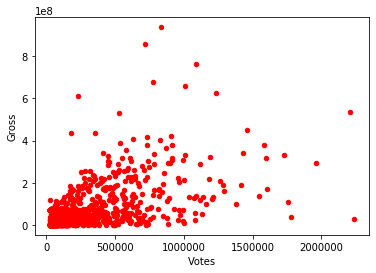

In [189]:
# Looking at the behaiour of gross and votes with eachother:
director_snip.plot.scatter(x='Votes',y='Gross',c='red')

In [191]:
#Lets combine votes and gross and try to rank the directors:
director_snip['Gross$Votes']=(director_snip['Votes']+director_snip['Gross'])/2

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
director_snip.head()

,Director,Votes,Gross,Gross$Votes
0,Frank Darabont,2239076,28341469.0,15290272.5
1,Francis Ford Coppola,1544094,134966411.0,68255252.5
2,Christopher Nolan,2209073,534858444.0,268533758.5
3,Francis Ford Coppola,1079839,57300000.0,29189919.5
4,Peter Jackson,1583334,377845905.0,189714619.5


In [193]:
#Sort the frame by the Gross$Votes in Descending
directors=director_snip.sort_values(by=['Gross$Votes'],ascending=False)

In [194]:
directors.head(10) #Top 10 Directors

,Director,Votes,Gross,Gross$Votes
468,J.J. Abrams,836972,936662225.0,468749598.5
59,"Anthony Russo, Joe Russo",716139,858373000.0,429544569.5
610,James Cameron,1091019,760507625.0,380799322.0
34,"Anthony Russo, Joe Russo",773417,678815482.0,339794449.5
641,James Cameron,1009642,659325379.0,330167510.5
347,Joss Whedon,1230738,623279547.0,312255142.5
871,Brad Bird,233081,608581744.0,304407412.5
2,Christopher Nolan,2209073,534858444.0,268533758.5
572,Gareth Edwards,529757,532177324.0,266353540.5
63,Christopher Nolan,1460859,448139099.0,224799979.0


In [195]:
stars_bunch=imdb_data[['Stars','Votes','Gross']]

In [205]:
all_stars=stars_bunch['Stars'].unique()

In [220]:
# listing out all stars uniquely into a separate list:
lst=[]
for i in range(len(list(all_stars))):
    for a_star in list(all_stars[i].split(',')):
        lst.append(a_star)

In [224]:
complete_stars=list(set(lst))

In [265]:
# Filtering out the dataframe wherever the star is present.:
# Unfortunately its failing as i am not using compare operator but need to use contains as i am searching whether that actor
# is present or not in that movie. --> therefore use str.contains()
for_frame=dict()
name_lst=list()
val_lst=list()
filter_=pd.DataFrame()
for search_S in complete_stars:
    #print(search_S.strip())
    filter_=imdb_data[imdb_data['Stars'].str.contains(search_S.strip())]
    #filter_=imdb_data.filter(like=search_S.strip(),axis=0)
    mean_val=(filter_['Votes'].mean()+filter_['Gross'].mean())/2
    name_lst.append(search_S.strip())
    val_lst.append(mean_val)

In [266]:
for_frame['Star_Name']=name_lst
for_frame['Votes$Gross']=val_lst

In [267]:
#Stars Dataframe created with Vote$Gross
star_frame=pd.DataFrame(data=for_frame)

In [268]:
star_frame.head()

,Star_Name,Votes$Gross
0,Patton Oswalt,1.035307e+08
1,Wah Yuen,8.615608e+06
2,Dustin Hoffman,4.665031e+07
3,Véra Clouzot,3.434531e+07
4,Mone Kamishiraishi,2.592611e+06


In [269]:
top_rated=star_frame.sort_values(by=['Votes$Gross'],ascending=False)

In [270]:
#Final top 10 actors:
top_rated.head(10)

,Star_Name,Votes$Gross
1656,John Boyega,4.687496e+08
177,Daisy Ridley,4.687496e+08
2814,Michelle Rodriguez,3.807993e+08
2108,Billy Zane,3.301675e+08
21,Huck Milner,3.044074e+08
1382,Sarah Vowell,3.044074e+08
2853,Diego Luna,2.663535e+08
50,Oscar Isaac,2.408490e+08
920,Chris Hemsworth,2.352063e+08
2687,Chris Hemsworth,2.352063e+08
